In [2]:
import pandas as pd , numpy as np

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df['Transmission Type']

0           MANUAL
1           MANUAL
2           MANUAL
3           MANUAL
4           MANUAL
           ...    
11909    AUTOMATIC
11910    AUTOMATIC
11911    AUTOMATIC
11912    AUTOMATIC
11913    AUTOMATIC
Name: Transmission Type, Length: 11914, dtype: object

In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [40]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
string_columns = list(df.dtypes[df.dtypes=='object'].index)

In [7]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [8]:
df.dtypes.index

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

2.3 Exploring Data analysis

In [20]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [12]:
import matplotlib.pyplot as plt
# import matplotlib_inline
import seaborn as sns

%matplotlib inline 

<Axes: xlabel='msrp', ylabel='Count'>

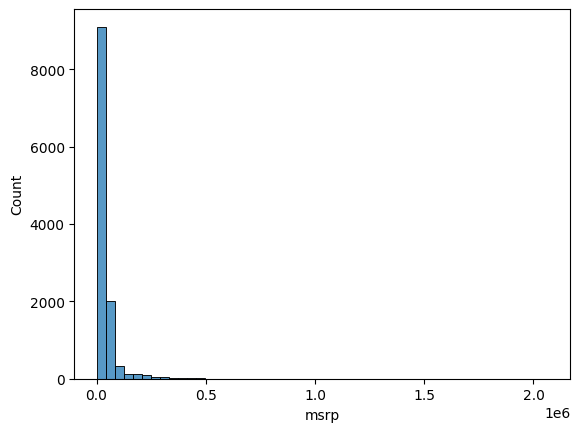

In [19]:
sns.histplot(df.msrp,bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

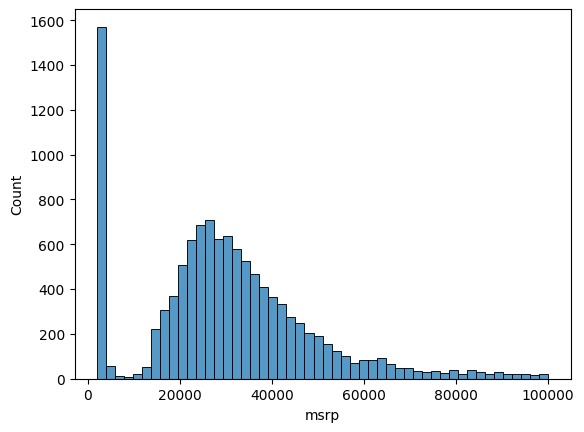

In [18]:
sns.histplot(df.msrp[df.msrp < 100000],bins=50)

In [21]:
log_price = np.log1p(df.msrp)

In [22]:
log_price

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

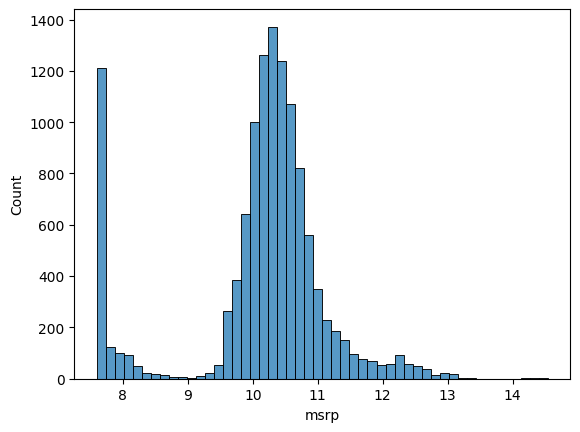

In [23]:
sns.histplot(log_price,bins=50)

## 2.3 Missing Value detection

In [26]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Seeting up the validation framework 

let's draw it 

In [43]:
n= len(df)

n_val = int(n*0.2)
n_test = int(n * 0.2)
n_train = int(n * 0.6)

In [44]:
n_val + n_test + n_train

11912

In [34]:
len(df)

11914

This method cna left some record so the idea is to take the test and the validation off the dataframe and take all the other for training

In [45]:
# n= len(df)

n_val = int(n*0.2)
n_test = int(n * 0.2)
n_train = n - n_test - n_val
n_train + n_test + n_val

11914

In [55]:
df.iloc[idx[:10]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
303,ferrari,360,2004,premium_unleaded_(required),425.0,8.0,automated_manual,rear_wheel_drive,2.0,"exotic,factory_tuner,high-performance",compact,coupe,15,10,2774,187124
4068,chevrolet,equinox,2016,regular_unleaded,182.0,4.0,automatic,all_wheel_drive,4.0,crossover,compact,4dr_suv,29,20,1385,28200
1877,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,30500
8983,hyundai,santa_fe_sport,2017,regular_unleaded,190.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,26,20,1439,27100
8024,mitsubishi,raider,2008,regular_unleaded,210.0,6.0,automatic,rear_wheel_drive,4.0,NaN,compact,crew_cab_pickup,20,15,436,25650
10156,toyota,t100,1997,regular_unleaded,190.0,6.0,manual,four_wheel_drive,2.0,NaN,large,extended_cab_pickup,17,15,2031,3143
1471,ford,aspire,1995,regular_unleaded,63.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,38,31,5657,2000
2460,dodge,challenger,2016,regular_unleaded,375.0,8.0,manual,rear_wheel_drive,2.0,high-performance,large,coupe,23,15,1851,34995
9204,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,passenger_minivan,23,16,2031,40655
8061,dodge,ram_150,1992,regular_unleaded,180.0,6.0,manual,rear_wheel_drive,2.0,NaN,large,regular_cab_pickup,17,14,1851,2000


In [ ]:
we need to shuffle that we have in all dataset it sample correctly the data 

In [47]:
idx = np.arange(n)

In [48]:
idx

array([    0,     1,     2, ..., 11911, 11912, 11913], shape=(11914,))

In [64]:
np.random.seed(1)
np.random.shuffle(idx)

In [70]:
df_train = df.iloc[ idx[:n_train] ]
df_val=df.iloc[idx[n_train : n_train + n_val]]
df_test = df.iloc[idx[n_val + n_train:]]

In [66]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8801,gmc,s-15,1990,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,regular_cab_pickup,19,15,549,2000
8763,chevrolet,s-10,2002,regular_unleaded,190.0,6.0,automatic,rear_wheel_drive,2.0,performance,compact,regular_cab_pickup,20,15,1385,21499
2667,chevrolet,c/k_2500_series,1998,regular_unleaded,230.0,8.0,manual,rear_wheel_drive,2.0,NaN,large,regular_cab_pickup,17,13,1385,2949
6691,lincoln,mark_lt,2006,regular_unleaded,300.0,8.0,automatic,four_wheel_drive,4.0,luxury,large,crew_cab_pickup,16,12,61,42235
1894,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,32475


In [83]:
len(df_train) , len(df_val) , len(df_test)

(7150, 2382, 2382)

### reset index for the new dataframes 

In [74]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [78]:
y_train = np.log1p( df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [79]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [81]:
len(y_train)

7150

## Linear regression simple

So the simple linear regression formula looks like:

$g(x_i) = w_0 + x_{i1} \cdot w_1 + x_{i2} \cdot w_2 + ... + x_{in} \cdot w_n$.

And that can be further simplified as:

$g(x_i) = w_0 + \displaystyle\sum_{j=1}^{n} w_j \cdot x_{ij}$

In [98]:
df_train.iloc[15]

make                            suzuki
model                          forenza
year                              2007
engine_fuel_type      regular_unleaded
engine_hp                        127.0
engine_cylinders                   4.0
transmission_type               manual
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                   compact
vehicle_style                    wagon
highway_mpg                         27
city_mpg                            19
popularity                         481
Name: 15, dtype: object

In [85]:
y_train

array([ 7.7432697 , 10.52220748,  7.60140233, ..., 10.18964346,
       10.53212288, 11.68014184], shape=(7150,))

In [99]:
xi=[124.0,19,481]

In [106]:
w0=7.17
w=[0.01,0.04,0.002]

In [100]:
def linear_regression(xi):
    n=len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [101]:
predict = linear_regression(xi)

In [103]:
predict,np.exp(12.312)

(2.9619999999999997, np.float64(222348.2221101062))

## Linear Regression vertor form

In [111]:
def dot(xi,w):
    n = len(xi)
    res = 0.0

    for j in range(n):
        res = res + xi[j] + w[j]
    return res

In [112]:
def linear_regression(xi):        
    return w0 + dot(xi,w)

In [107]:
w_new = [w0] + w

In [108]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [113]:
def linear_regression(xi):        
    xi = [1] + xi
    return dot(xi,w_new)

In [114]:
linear_regression(xi)

632.222

In [ ]:
w0 = 7.17
w =[0.01,0.04,0.002]
w_new = [w0] + w 

In [115]:
x1 = [1, 148, 24, 1385]
x2 = [1, 138, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  138,   25, 2031],
       [   1,  453,   11,   86]])

In [118]:
def linear_regression(x,w):
    return x.dot(w)

In [119]:
linear_regression(X,w_new)

array([12.38 , 13.612, 12.312])

## Training Linear Regression  

Normal Equation:

$w$ = $(X^TX)^{-1}X^Ty$

Where:

$X^TX$ is the Gram Matrix

In [120]:
def trian_linear_regression(X,y):
    pass

In [168]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]


In [169]:
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [156]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [157]:
X = np.column_stack([ones, X])

In [170]:
y = [ 100, 200, 150, 250, 100, 200, 150, 250, 120]

In [159]:
XTX = X.T.dot(X)
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [160]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [161]:
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [162]:
XTX_inv.dot(XTX).round(1)

array([[ 1., -0., -0.,  0.],
       [ 0.,  1., -0.,  0.],
       [ 0.,  0.,  1., -0.],
       [ 0.,  0., -0.,  1.]])

now we can apply this training formula to calculate the *w*

$w$ = $(X^TX)^{-1}X^Ty$

In [163]:
w_full = XTX_inv.dot(X.T).dot(y)

In [164]:
w0 = w_full[0]
w = w_full[1:]

In [165]:
w0, w

(np.float64(300.0677669255554), array([-0.22774253, -2.5769413 , -0.02301206]))

In [167]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [171]:
train_linear_regression(X,y)

(np.float64(300.0677669255554), array([-0.22774253, -2.5769413 , -0.02301206]))

## 2.8 Car Price baaseline model

In [172]:
df_train 

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,volvo,s70,2000,regular_unleaded,168.0,5.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,26,19,870
1,nissan,murano,2016,regular_unleaded,260.0,6.0,automatic,front_wheel_drive,4.0,crossover,midsize,4dr_suv,28,21,2009
2,volkswagen,vanagon,1990,regular_unleaded,90.0,4.0,automatic,rear_wheel_drive,3.0,NaN,large,passenger_minivan,16,15,873
3,dodge,ram_pickup_1500,2010,flex-fuel_(unleaded/e85),310.0,8.0,automatic,rear_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,19,14,1851
4,honda,hr-v,2017,regular_unleaded,141.0,4.0,automatic,front_wheel_drive,4.0,crossover,compact,4dr_suv,34,28,2202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,subaru,brz,2016,premium_unleaded_(required),200.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,coupe,30,22,640
7146,maserati,quattroporte,2017,premium_unleaded_(required),404.0,6.0,automatic,all_wheel_drive,4.0,"exotic,luxury,high-performance",large,sedan,23,16,238
7147,chrysler,200,2015,flex-fuel_(unleaded/e85),184.0,4.0,automatic,front_wheel_drive,4.0,"flex_fuel,performance",midsize,sedan,36,23,1013
7148,gmc,savana,2016,flex-fuel_(unleaded/e85),285.0,8.0,automatic,rear_wheel_drive,3.0,flex_fuel,large,passenger_van,16,11,549


In [173]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [180]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

X_train = df_train[base]

In [181]:
Y_train_without_miss_values = X_train.fillna(0).values

In [183]:
w0, w = train_linear_regression(Y_train_without_miss_values,y_train)

In [184]:
y_pred = w0 +X_train.dot(w)

In [185]:
y_pred

0        9.431328
1       10.203039
2        8.632072
3       10.160798
4        9.552673
          ...    
7145     9.976963
7146    11.429063
7147     9.924591
7148     9.851987
7149    12.501987
Length: 7150, dtype: float64

<Axes: ylabel='Count'>

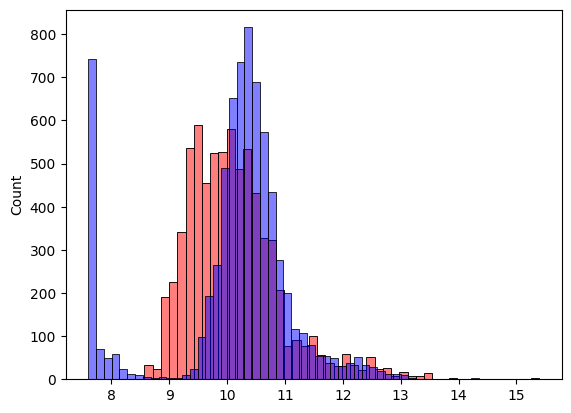

In [186]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## RMSE

Root Mean Square Error : evaluate a model 

In [192]:
def rmse(y,y_pred):
    error =  y - y_pred
    se =  error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [188]:
rmse(y_train, y_pred)

np.float64(0.7424730443295795)

## Validating the model 

In [ ]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

X_train = df_train[base]

Y_train_without_miss_values = X_train.fillna(0).values

w0, w = train_linear_regression(Y_train_without_miss_values,y_train)

y_pred = w0 +X_train.dot(w)

In [190]:
def prepare_X(df,base):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [193]:
# training model
X_train = preapre_X(df_train,base)
w0, w = train_linear_regression(X_train, y_train)

# make prediction
X_val= prepare_X(df_val,base)
y_pred = w0 + X_val.dot(w)

##validating model 
rmse(y_val, y_pred)

np.float64(0.7544942477203505)

## 2.11 Simple feature engineering

In [194]:
2017 - df_train.year

0       17
1        1
2       27
3        7
4        0
        ..
7145     1
7146     0
7147     2
7148     1
7149     2
Name: year, Length: 7150, dtype: int64

In [197]:
def prepare_X(df,base):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = ['age'] + base
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [202]:
X_train = prepare_X(df_train,base)
w0, w = train_linear_regression(X_train, y_train)

# make prediction
X_val= prepare_X(df_val,base)
y_pred = w0 + X_val.dot(w)

##validating model 
rmse(y_val, y_pred)

np.float64(0.5154468355002169)

<Axes: ylabel='Count'>

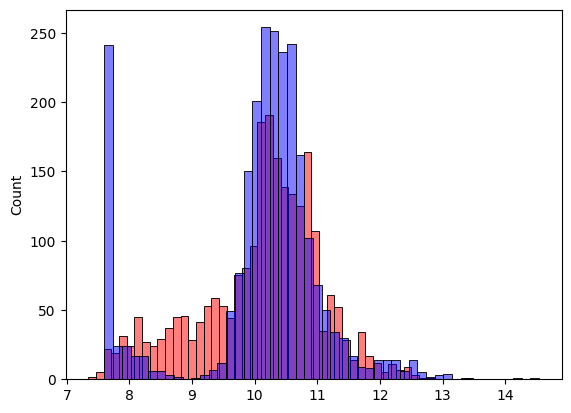

In [203]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

## 2.12 Categorical variable 

In [206]:
# for value in [2,3,4]
df_train['number_of_doors'].unique()

array([ 4.,  3.,  2., nan])

In [ ]:
# code to prepare the features
for value in [2,3,4]:
    df_train['num_doors_%s' % values]= (df_train.number_of_doors == values ).astype('int')

In [ ]:
# add the number of door to the feature to see if it improove
def prepare_X(df,base):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for value in [2, 3, 4]:
        df['num_doors_%s' % value]= (df.number_of_doors == value).astype('int')
        features.append('num_doors_%s' % value)

    df.head()
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [231]:
X_train = prepare_X(df_train,base)
w0, w = train_linear_regression(X_train, y_train)

# make prediction
X_val= prepare_X(df_val,base)
y_pred = w0 + X_val.dot(w)

##validating model 
rmse(y_val, y_pred)

np.float64(0.5128100414445926)

0.5154468355002169

In [238]:
df.make.value_counts().head().index

Index(['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'], dtype='object', name='make')

In [239]:
makes = ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [240]:
# add the make to the feature to see if it improove
def prepare_X(df,base):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for value in makes:
        df['make_%s' % value]= (df.make == value).astype('int')
        features.append('make_%s' % value)
        
    for value in [2, 3, 4]:
        df['num_doors_%s' % value]= (df.number_of_doors == value).astype('int')
        features.append('num_doors_%s' % value)

    df.head()
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [241]:
X_train = prepare_X(df_train,base)
w0, w = train_linear_regression(X_train, y_train)

# make prediction
X_val= prepare_X(df_val,base)
y_pred = w0 + X_val.dot(w)

##validating model 
rmse(y_val, y_pred)

np.float64(0.5038217704925758)

0.5128100414445926

In [ ]:
# generlize all the categorical variable 

In [242]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [269]:
categorical_varibales = list(( 
'make',
'engine_fuel_type',
'transmission_type',  
'driven_wheels',
'vehicle_size',          
'vehicle_style'   
))

In [270]:
categories ={}

for c in categorical_varibales:
    categories[c] = list(df[c].value_counts().head().index)

In [271]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [267]:
# add the make to the feature to see if it improove
def prepare_X(df,base):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

        
    for value in [2, 3, 4]:
        df['num_doors_%s' % value]= (df.number_of_doors == value).astype('int')
        features.append('num_doors_%s' % value)
        
    for key, values in categories.items():
        for value in values:
            df['%s_%s' % (key,value)]= (df[key] == value).astype('int')
            features.append('%s_%s' % (key,value))

    df.head()
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [272]:
X_train = prepare_X(df_train,base)
w0, w = train_linear_regression(X_train, y_train)

# make prediction
X_val= prepare_X(df_val,base)
y_pred = w0 + X_val.dot(w)

##validating model 
rmse(y_val, y_pred)

np.float64(18.195986289104923)

0.5038217704925758